In [115]:
!pip install seaborn

In [116]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics

In [117]:
file = pd.read_csv('Wine.csv')
file 

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [152]:
x, y = file.iloc[:,:-1], file['Customer_Segment']

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [154]:
scaler = StandardScaler()
model = scaler.fit(x_train)
x_scaled_data = model.transform(x_train)
#x_scaled_data

In [155]:
pca = PCA(n_components=2)
new_x = pca.fit_transform(x_scaled_data)

In [156]:
LR = LogisticRegression()
LR.fit(new_x, y_train)

LogisticRegression()

In [157]:
pca = PCA(n_components=2)
new_x_test = pca.fit_transform(x_test)

In [158]:
predict = LR.predict(new_x_test)
score = LR.score(new_x_test, )
score

0.5555555555555556

In [126]:
import matplotlib.pyplot as plt

In [127]:
cm = metrics.confusion_matrix(y_test, predict)
print(cm)

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


Text(0.5, 1.0, 'Accuracy Score: 1.0')

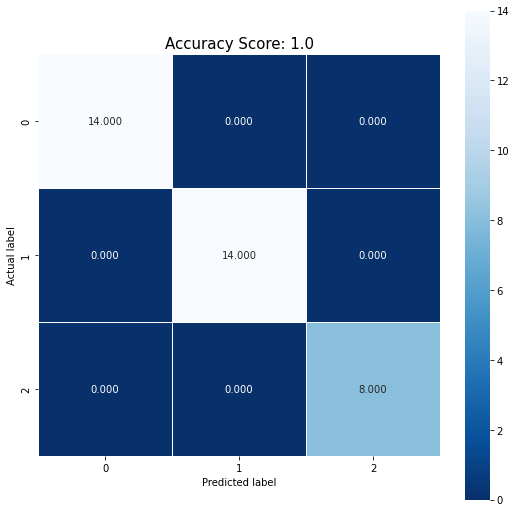

In [128]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [168]:
#CROSS VALIDATION\\
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

model = scaler.fit(x)
kf_x = model.transform(x)
pca = PCA(n_components=2)
new_kf_x = pca.fit_transform(kf_x)
score_ = cross_val_score(LR, new_kf_x, y, scoring='accuracy', cv = KFold(n_splits = 5), n_jobs = -1)
print(f"Accuracy: {np.mean(score_)}")

Accuracy: 0.9384126984126983
